This notebook contains an example for teaching.


# Automatic Machine Learning with H2O AutoML using Wage Data from 2015

We illustrate how to predict an outcome variable Y in a high-dimensional setting, using the AutoML package *H2O* that covers the complete pipeline from the raw dataset to the deployable machine learning model. In last few years, AutoML or automated machine learning has become widely popular among data science community. 

We can use AutoML as a benchmark and compare it to the methods that we used in the previous notebook where we applied one machine learning method after the other.

In [4]:
# load the H2O package
library(h2o)
# start h2o cluster
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\MSI-NB\AppData\Local\Temp\RtmpobARwD\file525c44661499/h2o_MSI_NB_started_from_r.out
    C:\Users\MSI-NB\AppData\Local\Temp\RtmpobARwD\file525c787c854/h2o_MSI_NB_started_from_r.err


Starting H2O JVM and connecting: ............................................................ Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         1 seconds 479 milliseconds 
    H2O cluster timezone:       America/Lima 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.32.1.1 
    H2O cluster version age:    23 days  
    H2O cluster name:           H2O_from_python_MSI_NB_quco3q 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   7.96 GB 
    H2O cluster total cores:    12 
    H2O cluster allowed cores:  12 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:     

In [5]:
# load the data set
load("wage2015_subsample_inference.Rdata")

# split the data
set.seed(1234)
training <- sample(nrow(data), nrow(data)*(3/4), replace=FALSE)

train <- data[training,]
test <- data[-training,]

In [3]:
# start h2o cluster
h2o.init()


H2O is not running yet, starting it now...

Note:  In case of errors look at the following log files:
    C:\Users\MSI-NB\AppData\Local\Temp\RtmpobARwD\file525c864eed/h2o_MSI_NB_started_from_r.out
    C:\Users\MSI-NB\AppData\Local\Temp\RtmpobARwD\file525c7f8a7e5d/h2o_MSI_NB_started_from_r.err


Starting H2O JVM and connecting: ............................................................Diagnostic HTTP Request:
   HTTP Status Code: -1
HTTP Error Message: Failed to connect to localhost port 54321: Connection refused
 
Error Output:
   Only Java versions 8-15 are supported, system version is 16 


ERROR: Error in h2o.init(): H2O failed to start, stopping execution.


In [6]:
# convert data as h2o type
train_h = as.h2o(train)
test_h = as.h2o(test)

# have a look at the data
h2o.describe(train_h)

  |======================================================================| 100%
  |======================================================================| 100%


Label,Type,Missing,Zeros,PosInf,NegInf,Min,Max,Mean,Sigma,Cardinality
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wage,real,0,0,0,0,3.021978,528.845673,23.37760006,20.6094388,NA
lwage,real,0,0,0,0,1.105912,6.270697,2.96967335,0.5721780,NA
sex,int,0,2115,0,0,0.000000,1.000000,0.45235629,0.4977894,NA
shs,int,0,3770,0,0,0.000000,1.000000,0.02382185,0.1525136,NA
hsg,int,0,2896,0,0,0.000000,1.000000,0.25012947,0.4331435,NA
scl,int,0,2795,0,0,0.000000,1.000000,0.27628172,0.4472157,NA
clg,int,0,2646,0,0,0.000000,1.000000,0.31486277,0.4645213,NA
ad,int,0,3341,0,0,0.000000,1.000000,0.13490419,0.3416654,NA
mw,int,0,2872,0,0,0.000000,1.000000,0.25634386,0.4366704,NA


In [7]:
# define the variables
y = 'lwage'
x = setdiff(names(data), c('wage','occ2', 'ind2'))
x

[1] "lwage" "sex"   "shs"   "hsg"   "scl"   "clg"   "ad"    "mw"    "so"   
[10] "we"    "ne"    "exp1"  "exp2"  "exp3"  "exp4"  "occ"   "ind"

In [8]:
# run AutoML for 10 base models and a maximal runtime of 100 seconds
aml = h2o.automl(x=x,y = y,
                  training_frame = train_h,
                  leaderboard_frame = test_h,
                  max_models = 10,
                  seed = 1,
                  max_runtime_secs = 100
                 )
# AutoML Leaderboard
lb = aml@leaderboard
print(lb, n = nrow(lb))

Warning message in .verify_dataxy(training_frame, x, y):
"removing response variable from the explanatory variables"


  |                                                                      |   0%
  |======================================================================| 100%
                                              model_id mean_residual_deviance
1     StackedEnsemble_AllModels_AutoML_20210418_161218              0.2161851
2  StackedEnsemble_BestOfFamily_AutoML_20210418_161218              0.2169465
3                         GLM_1_AutoML_20210418_161218              0.2249230
4                         GBM_2_AutoML_20210418_161218              0.2267006
5                         GBM_1_AutoML_20210418_161218              0.2272519
6           GBM_grid__1_AutoML_20210418_161218_model_1              0.2277730
7                         GBM_4_AutoML_20210418_161218              0.2282935
8                         GBM_3_AutoML_20210418_161218              0.2296293
9                         GBM_5_AutoML_20210418_161218              0.2304692
10                        DRF_1_AutoML_20210418_161218      

We see that two Stacked Ensembles are at the top of the leaderboard. Stacked Ensembles often outperform a single model. The out-of-sample (test) MSE of the leading model is given by

In [9]:
aml@leaderboard$mse[1]

        mse
1 0.2161851

[1 row x 1 column] 

The in-sample performance can be evaluated by

In [10]:
aml@leader

Model Details:

H2ORegressionModel: stackedensemble
Model ID:  StackedEnsemble_AllModels_AutoML_20210418_161218 
Number of Base Models: 10

Base Models (count by algorithm type):

deeplearning          drf          gbm          glm 
           1            2            6            1 

Metalearner:

Metalearner algorithm: glm
Metalearner cross-validation fold assignment:
  Fold assignment scheme: AUTO
  Number of folds: 5
  Fold column: NULL
Metalearner hyperparameters: 


H2ORegressionMetrics: stackedensemble
** Reported on training data. **

MSE:  0.1120885
RMSE:  0.3347963
MAE:  0.2505204
RMSLE:  0.08668005
Mean Residual Deviance :  0.1120885



H2ORegressionMetrics: stackedensemble
** Reported on cross-validation data. **
** 5-fold cross-validation on training data (Metrics computed for combined holdout predictions) **

MSE:  0.2145879
RMSE:  0.4632364
MAE:  0.3508643
RMSLE:  0.1186928
Mean Residual Deviance :  0.2145879



This is in line with our previous results. To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model.  The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run.  This is often the top performing model on the leaderboard.

In [11]:
model_ids <- as.data.frame(aml@leaderboard$model_id)[,1]
# Get the "All Models" Stacked Ensemble model
se <- h2o.getModel(grep("StackedEnsemble_AllModels", model_ids, value = TRUE)[1])
# Get the Stacked Ensemble metalearner model
metalearner <- se@model$metalearner_model
h2o.varimp(metalearner)

variable,relative_importance,scaled_importance,percentage
<chr>,<dbl>,<dbl>,<dbl>
GLM_1_AutoML_20210418_161218,0.188113615,1.000000000,0.508876692
GBM_2_AutoML_20210418_161218,0.074993841,0.398662486,0.202870047
DRF_1_AutoML_20210418_161218,0.040507846,0.215337128,0.109580045
GBM_4_AutoML_20210418_161218,0.027679166,0.147140683,0.074876464
GBM_1_AutoML_20210418_161218,0.026224079,0.139405532,0.070940226
GBM_3_AutoML_20210418_161218,0.005993288,0.031859940,0.016212781
XRT_1_AutoML_20210418_161218,0.004510717,0.023978687,0.012202195
GBM_grid__1_AutoML_20210418_161218_model_1,0.001641883,0.008728145,0.004441549
GBM_5_AutoML_20210418_161218,0.000000000,0.000000000,0.000000000


The table above gives us the variable importance of the metalearner in the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM. 


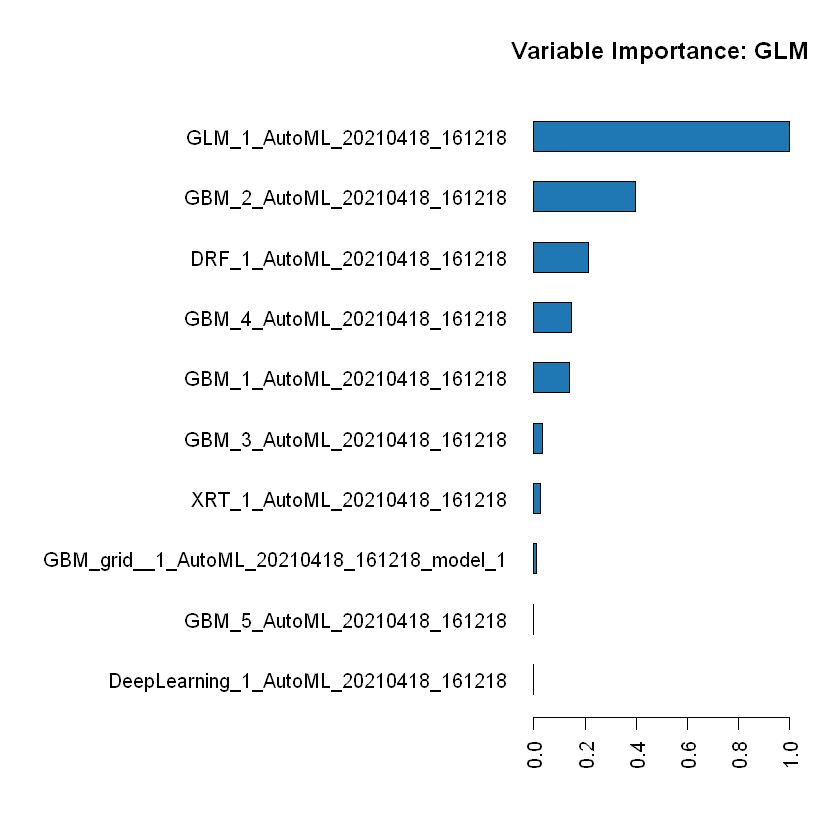

In [13]:
h2o.varimp_plot(metalearner)

## Generating Predictions Using Leader Model

We can also generate predictions on a test sample using the leader model object.

In [14]:
pred <- as.matrix(h2o.predict(aml@leader,test_h)) # make prediction using x data from the test sample
head(pred)

  |======================================================================| 100%


Warning message in doTryCatch(return(expr), name, parentenv, handler):
"Test/Validation dataset column 'occ' has levels not trained on: ["2050", "2840", "3610", "3710", "3910", "4130", "5250", "5630", "6530", "6720", "8620", "9200", "9750"]"
Warning message in doTryCatch(return(expr), name, parentenv, handler):
"Test/Validation dataset column 'ind' has levels not trained on: ["4980", "690", "7990"]"


predict
3.230960
2.614709
3.425559
2.395329
2.788637
2.652132


This allows us to estimate the out-of-sample (test) MSE and the standard error as well.

In [15]:
y_test <- as.matrix(test_h$lwage)
summary(lm((y_test-pred)^2~1))$coef[1:2]

[1] 0.21618514 0.01323396

We observe both a lower MSE and a lower standard error compared to our previous results (see [here](https://www.kaggle.com/janniskueck/pm3-notebook-newdata)).

In [ ]:
h2o.shutdown(prompt = F)